In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from cycler import cycler
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import GridSearchCV


plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.facecolor'] = '#FBFFFE'
plt.rcParams['figure.facecolor'] = '#FBFFFE'
plt.rcParams['text.color'] = '#162A50'
plt.rcParams['lines.color'] = '#FBFFFE'
plt.rcParams['grid.color'] = '#0E1C36'
plt.rcParams['grid.alpha'] = 0.1
plt.rcParams['axes.labelcolor'] ='#162A50'
plt.rcParams['axes.prop_cycle'] = cycler(color=['#4472CA', '#D62828', '#FFC857', '#0E1C36', '#B388EB'])

## Dataset inspection

In [199]:
data = pd.read_csv('./breast-cancer.csv')
data.sample(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
499     91485         M       20.590         21.24          137.80     1320.0  \
160   8711561         B       11.750         20.18           76.10      419.8   
62     858986         M       14.250         22.15           96.42      645.7   
511    915664         B       14.810         14.70           94.66      680.7   
508    915452         B       16.300         15.70          104.70      819.8   
506  91544001         B       12.220         20.04           79.47      453.1   
526  91813701         B       13.460         18.75           87.44      551.1   
137    868682         B       11.430         15.39           73.06      399.8   
337    897630         M       18.770         21.43          122.90     1092.0   
63     859196         B        9.173         13.86           59.20      260.9   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
499          0.10850           0.16440         0.21880              0.11210  \
160          0.10890           0.11410         0.06843              0.03738   
62           0.10490           0.20080         0.21350              0.08653   
511          0.08472           0.05016         0.03416              0.02541   
508          0.09427           0.06712         0.05526              0.04563   
506          0.10960           0.11520         0.08175              0.02166   
526          0.10750           0.11380         0.04201              0.03152   
137          0.09639           0.06889         0.03503              0.02875   
337          0.09116           0.14020         0.10600              0.06090   
63           0.07721           0.08751         0.05988              0.02180   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst   
499  ...         23.86          30.76           163.20      1760.0  \
160  ...         13.32          26.21            88.91       543.9   
62   ...         17.67          29.51           119.10       959.5   
511  ...         15.61          17.58           101.70       760.2   
508  ...         17.32          17.76           109.80       928.2   
506  ...         13.16          24.17            85.13       515.3   
526  ...         15.35          25.16           101.90       719.8   
137  ...         12.32          22.02            79.93       462.0   
337  ...         24.54          34.37           161.10      1873.0   
63   ...         10.01          19.23            65.59       310.1   

     smoothness_worst  compactness_worst  concavity_worst   
499           0.14640             0.3597           0.5179  \
160           0.13580             0.1892           0.1956   
62            0.16400             0.6247           0.6922   
511           0.11390             0.1011           0.1101   
508           0.13540             0.1361           0.1947   
506           0.14020             0.2315           0.3535   
526           0.16240             0.3124           0.2654   
137           0.11900             0.1648           0.1399   
337           0.14980             0.4827           0.4634   
63            0.09836             0.1678           0.1397   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
499               0.21130          0.2480                  0.08999  
160               0.07909          0.3168                  0.07987  
62                0.17850          0.2844                  0.11320  
511               0.07955          0.2334                  0.06142  
508               0.13570          0.2300                  0.07230  
506               0.08088          0.2709                  0.08839  
526               0.14270          0.3518                  0.08665  
137               0.08476          0.2676                  0.06765  
337               0.20480          0.3679                  0.09870  
63                0.05087          0.3282                  0.08490  

[10 rows x 32 columns]

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [201]:
print('Null values:', data.isnull().sum().sum())

Null values: 0


In [202]:
data.shape

(569, 32)

The dataset is made up by 569 instances, and each instance has 30 features (plus the id of the instance, and the classification as Malign or Benign). All the features are numeric (flots) and there are no missing values.

## Exploratory Data Analysis (on trianing data)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:, 2:], 
    data.diagnosis,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### Distribution of features

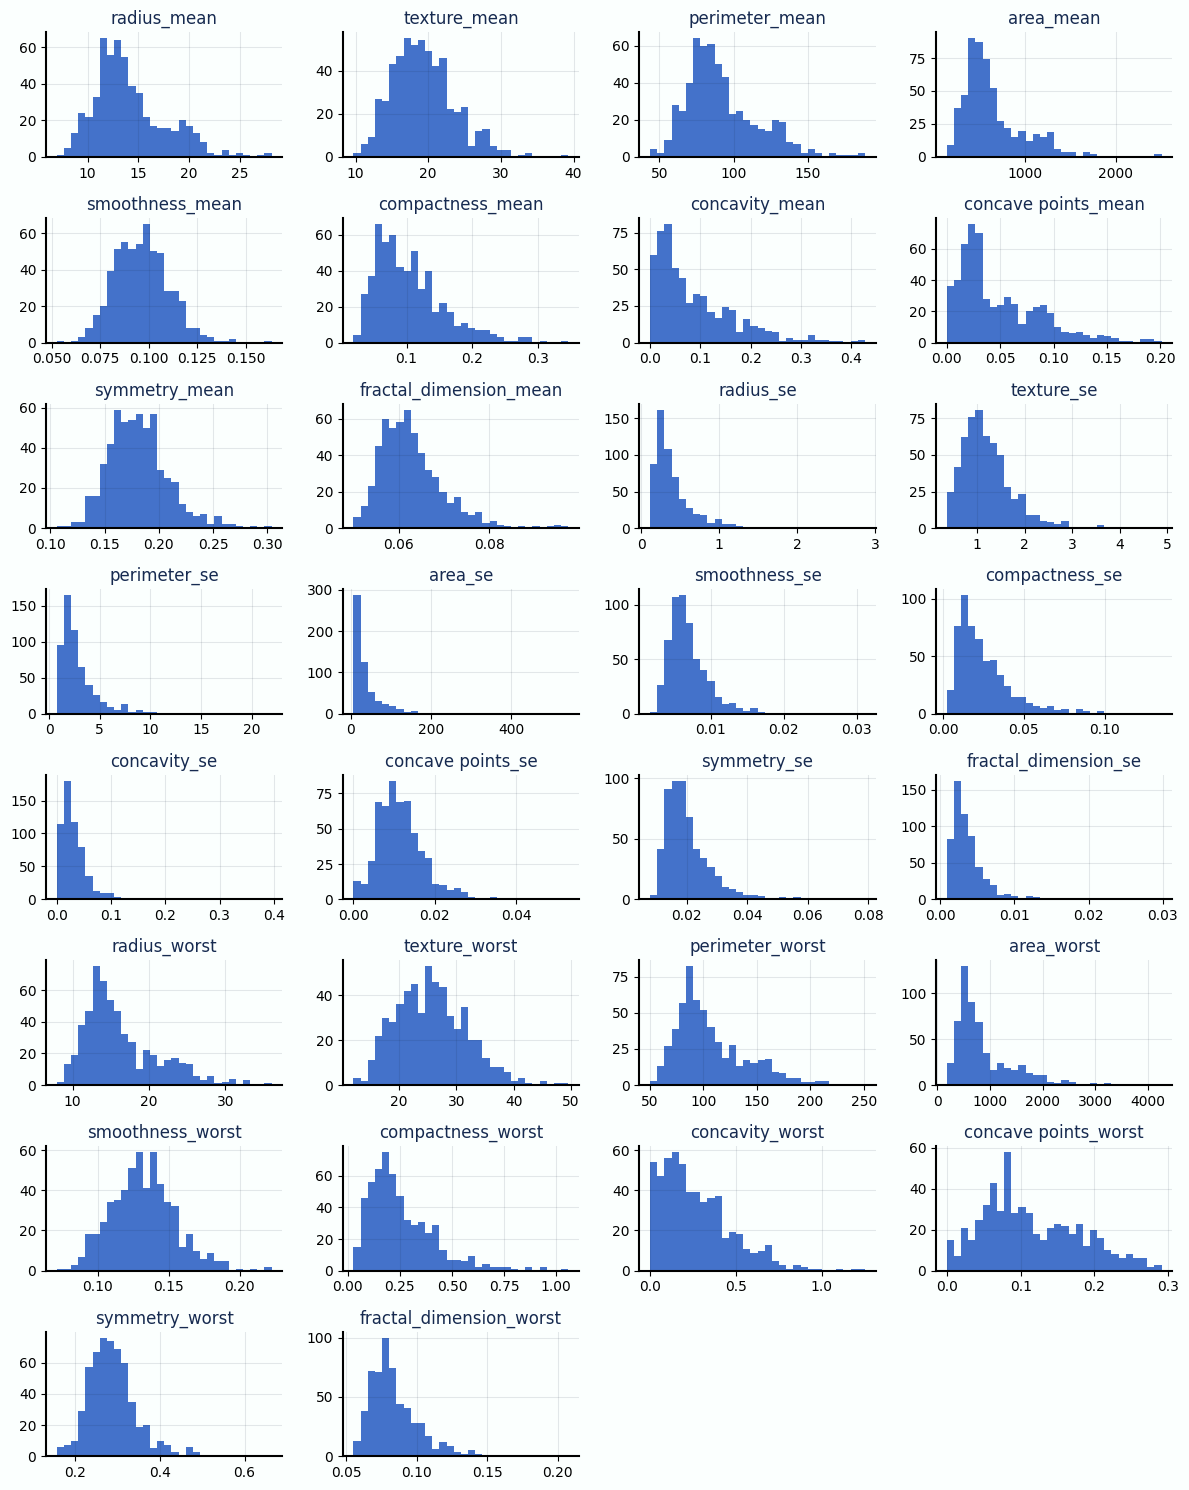

In [7]:
data.iloc[:, 2:].hist(bins=30, figsize=(12, 15), 
                      layout=(8, 4))
plt.gcf().tight_layout()

### Correlation between features

Text(0.05, 0.92, 'Correlation matrix (all features)')

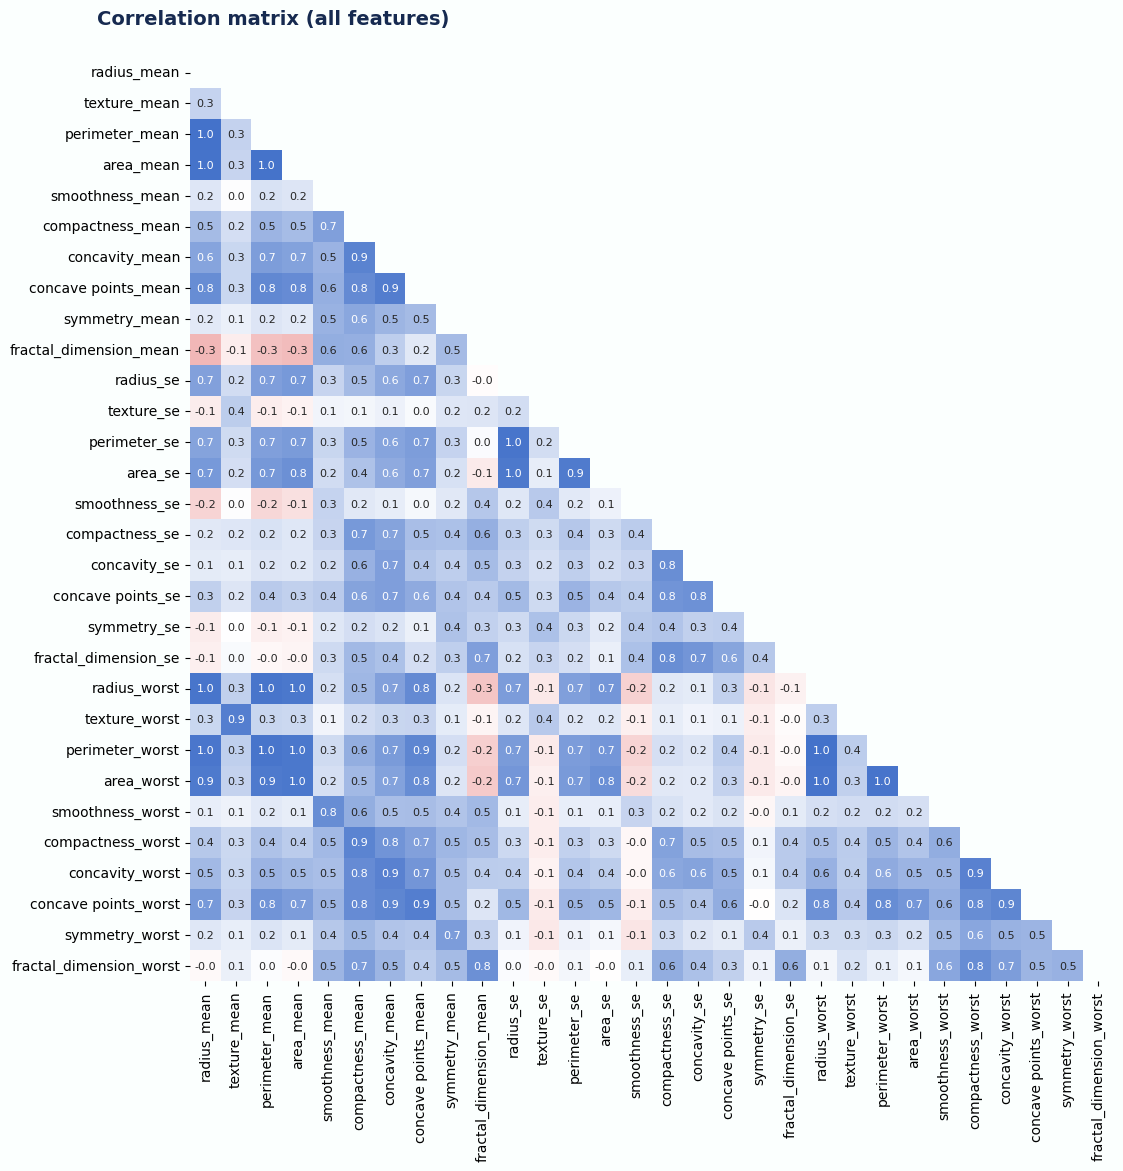

In [8]:
features_corr = X_train.corr()
cmap = LinearSegmentedColormap.from_list('custom', ['C1','white', 'C0'])

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(np.tril(features_corr), cmap=cmap, vmin=-1, vmax=1, 
            square=True, annot=True, ax=ax, cbar=False, fmt='.1f', 
            xticklabels=features_corr.index, yticklabels=features_corr.index, 
            annot_kws={'fontsize': 8}, 
            mask=np.triu(np.ones_like(features_corr)))

fig.suptitle('Correlation matrix (all features)', fontsize=14, fontweight='bold', 
             x=0.05, y=0.92, ha='left')

Since there are highly correlated features (even features with a correlation of 1), then we'll have to drop the correlated features. For this, let's create a custom Transformer.

In [9]:
from sklearn.base import TransformerMixin, BaseEstimator

class DropCorrelated(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=0.8):
        self.thresh = thresh
        
    def fit(self, X, y=None):
        abs_corr = np.abs(X.corr())
        selected = []
        
        for col in abs_corr:
            if not selected:
                selected.append(col)
            else:
                if (abs_corr.loc[col, :col] > 0.85).sum() == 1:
                    selected.append(col)
                    
        self.selected_features_ = selected
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features_]

Text(0.05, 0.92, 'Correlation matrix (without correlated features)')

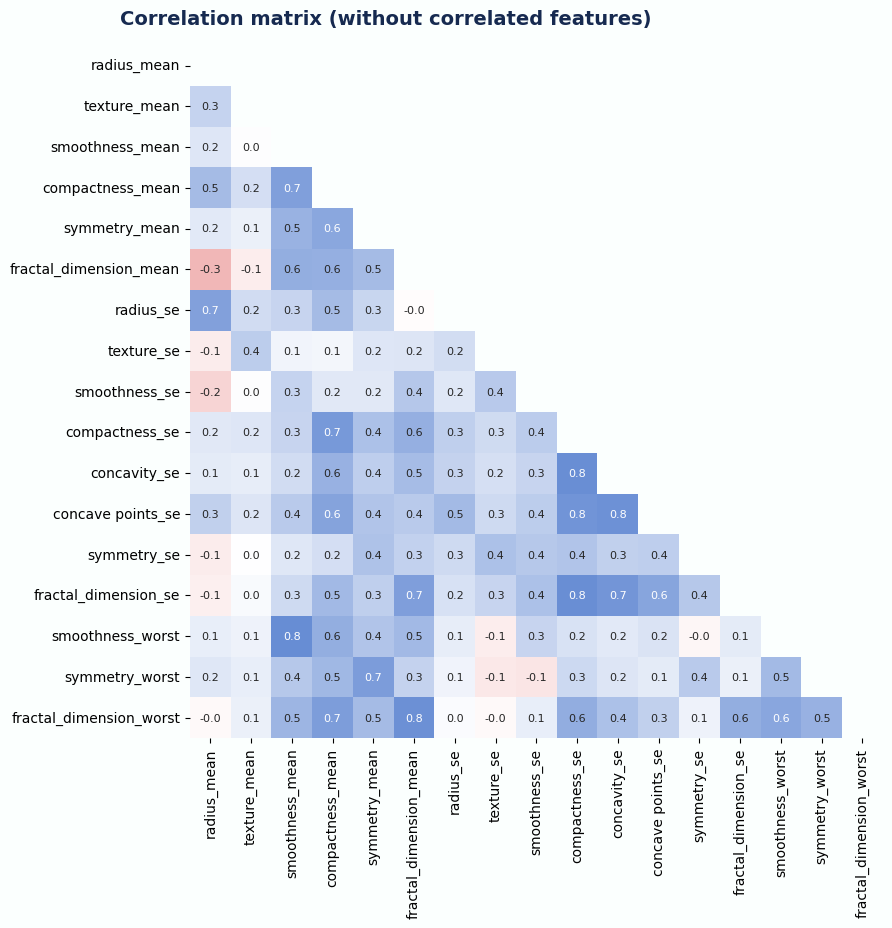

In [10]:
X_train_clean = DropCorrelated(0.8).fit_transform(X_train)

features_corr = X_train_clean.corr()
cmap = LinearSegmentedColormap.from_list('custom', ['C1','white', 'C0'])
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(np.tril(features_corr), cmap=cmap, vmin=-1, vmax=1, 
            square=True, annot=True, ax=ax, cbar=False, fmt='.1f', 
            xticklabels=features_corr.index, yticklabels=features_corr.index, 
            annot_kws={'fontsize': 8}, 
            mask=np.triu(np.ones_like(features_corr)))

fig.suptitle('Correlation matrix (without correlated features)', fontsize=14, fontweight='bold', 
             x=0.05, y=0.92, ha='left')

### Pairplot 

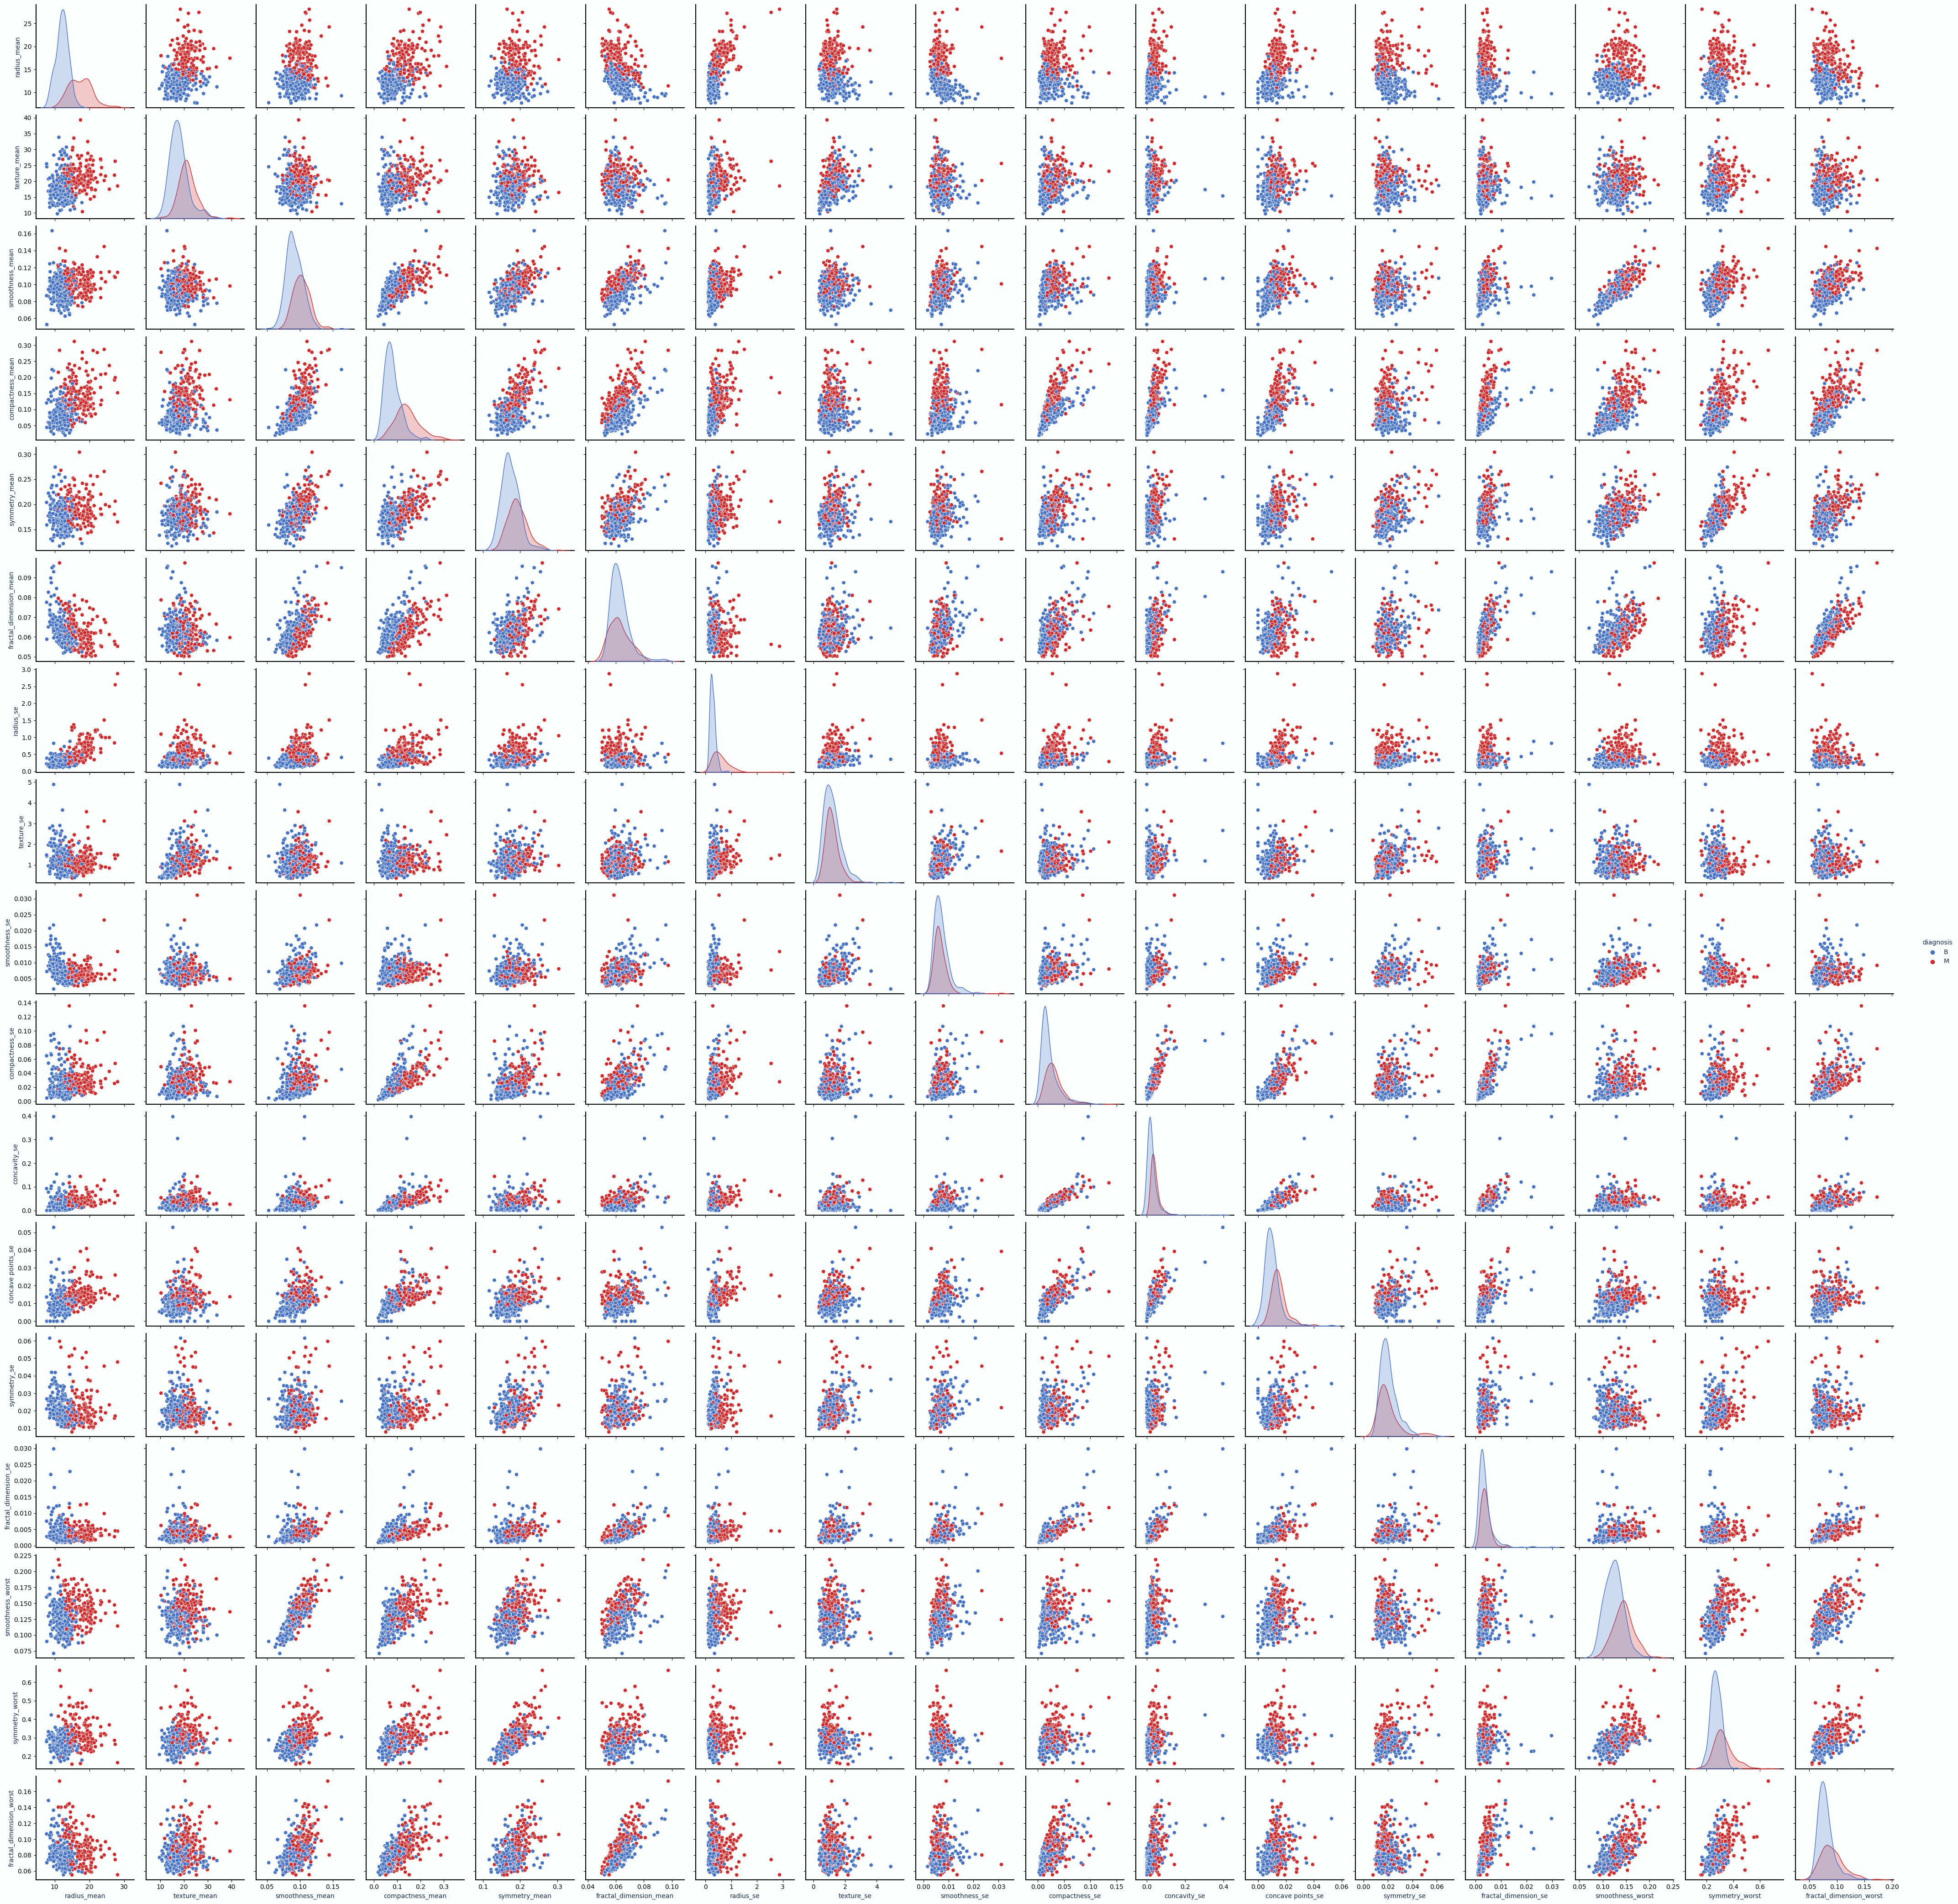

In [11]:
sns.pairplot(
    data=pd.concat([X_train_clean, y_train], axis=1), 
    hue='diagnosis'
)

Visual inspection of the scatterplots suggests potential separability between the two classes. Particularly, features in the first row and first column exhibit clear distinction between the classes. Based on this observation, a Support Vector Machine (SVM) classifier is a suitable candidate for building a model to differentiate these classes

## Machine learning model

To distinguish between the two classes, we can build a machine learning pipeline with the following steps:

1. **Feature Selection**: Utilize a correlation analysis to identify and remove highly correlated features. This can improve model performance and reduce overfitting.

2. **Feature Scaling**: Normalize the features using the technique MinMaxScaler. Scaling ensures all features contribute equally during model training.

3. **Support Vector Machine Classification (SVC)**: Employ an SVC classifier to learn a decision boundary that separates the two classes. 

We can optimize hyperparameters of the SVC using techniques like GridSearchCV for optimal performance.By incorporating these steps into a pipeline, we can ensure a robust and efficient machine learning workflow."

In [216]:
y_train = (y_train == 'M')

### Machine Learning Pipeline and Hyperparameter Tuning

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

model = Pipeline([
    ('drop_corr_features', DropCorrelated(0.85)),
    ('scaler', MinMaxScaler()),
    ('classifier', SVC(kernel='linear', C=1E3, probability=True))
])

gsearch = {
    'drop_corr_features__thresh':[0.7, 0.75, 0.8, 0.85, 0.9],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__C': [1, 10, 100, 1e3, 1e4, 1e5, 1e6]
}

search = GridSearchCV(model, param_grid=gsearch, cv=5)
search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_corr_features',
                                        DropCorrelated(thresh=0.85)),
                                       ('scaler', MinMaxScaler()),
                                       ('classifier',
                                        SVC(C=1000.0, kernel='linear',
                                            probability=True))]),
             param_grid={'classifier__C': [1, 10, 100, 1000.0, 10000.0,
                                           100000.0, 1000000.0],
                         'classifier__kernel': ['linear', 'rbf'],
                         'drop_corr_features__thresh': [0.7, 0.75, 0.8, 0.85,
                                                        0.9]})

In [14]:
search.best_params_

{'classifier__C': 1,
 'classifier__kernel': 'rbf',
 'drop_corr_features__thresh': 0.7}

### Model Evaluation (Trining data)

In [217]:
predicts = cross_val_predict(search.best_estimator_, X_train, y_train, cv=3, 
                             method='predict_proba')

Text(33.222222222222214, 0.5, 'Pred Value')

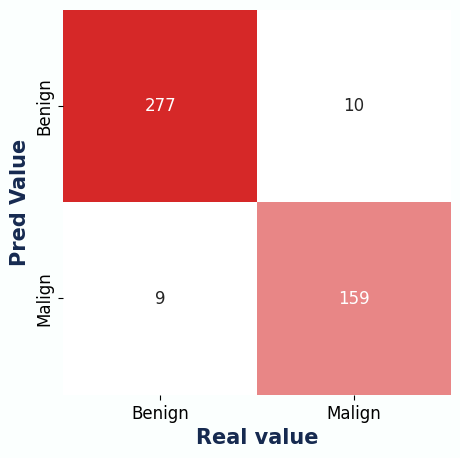

In [218]:
fig, ax = plt.subplots(figsize=(5, 5))

cmap = LinearSegmentedColormap.from_list('custom', ['white', 'C1'])
sns.heatmap(
    data=confusion_matrix(y_train, (predicts > 0.5)[:, 1]).T, 
    cmap=cmap, 
    cbar=False, 
    annot=True,
    fmt='.0f',
    xticklabels=['Benign', 'Malign'],
    yticklabels=['Benign', 'Malign'],
)

for text in ax.texts:
    text.set_fontsize(12)
ax.tick_params(labelsize=12)
ax.set_xlabel('Real value', fontweight='bold', fontsize=15)
ax.set_ylabel('Pred Value', fontweight='bold', fontsize=15)

In [219]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

bin_predicts = (predicts > 0.5)[:, 1]

performance = pd.DataFrame({
    'metric': ['accuracy', 'recall', 'precision'], 
    'value': [accuracy_score(y_train, bin_predicts),
              recall_score(y_train, bin_predicts), 
              precision_score(y_train, bin_predicts),]
})

performance

metric     value
0   accuracy  0.958242
1     recall  0.940828
2  precision  0.946429

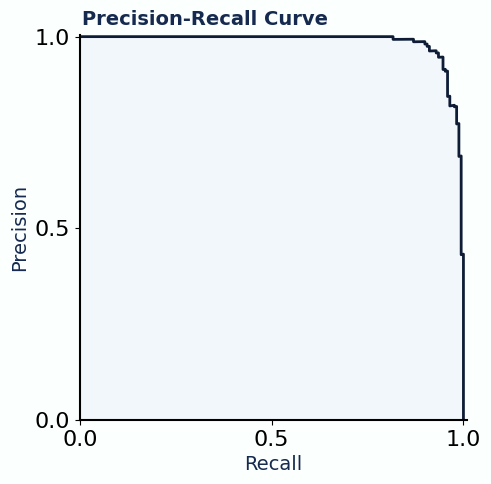

In [220]:
from sklearn.metrics import precision_recall_curve
pre, rec, thre = precision_recall_curve(y_train, predicts[:, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(
    [1] + list(rec), 
    [0] + list(pre),
    lw=2, color='C3')
ax.fill_between(rec, pre, color='C0', alpha=0.05)
ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set(xlim=[0, 1.01], ylim=[0, 1.005])

fig.suptitle('Precision-Recall Curve', fontsize=14, ha='left', fontweight='bold', 
             x=0.13, y=0.93)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.tick_params(labelsize=16)

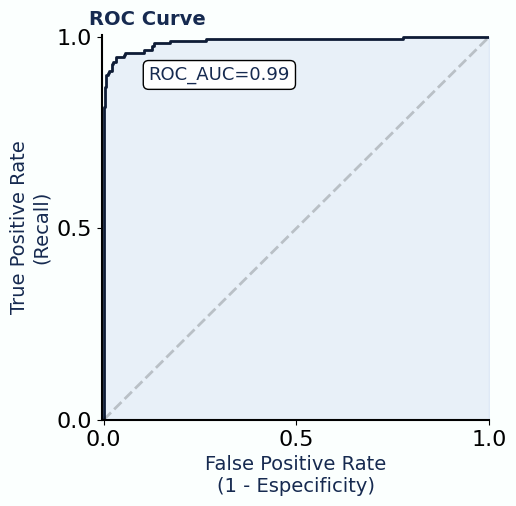

In [221]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thrs = roc_curve(y_train, predicts[:, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(fpr, tpr, lw=2, color='C3')
ax.fill_between(fpr, tpr, color='C0', alpha=0.1)
ax.set(xlim=[-0.005, 1], ylim=[0, 1.005])
ax.plot([0, 1], [0, 1], lw=2, ls='--', color='black', alpha=0.2)
ax.annotate(xy=(0.3, 0.9), text=f'ROC_AUC={roc_auc_score(y_train, predicts[:, 1]):.2f}', 
            ha='center', va='center', size=13, bbox={'boxstyle':'round', 'facecolor':'white'})

fig.suptitle('ROC Curve', fontsize=14, ha='left', fontweight='bold', 
             x=0.1, y=0.93)

ax.set_xlabel('False Positive Rate\n(1 - Especificity)', fontsize=14)
ax.set_ylabel('True Positive Rate\n(Recall)', fontsize=14)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.tick_params(labelsize=16)

Text(0.1, 1, 'Distribution of predictions for malign/benign classes')

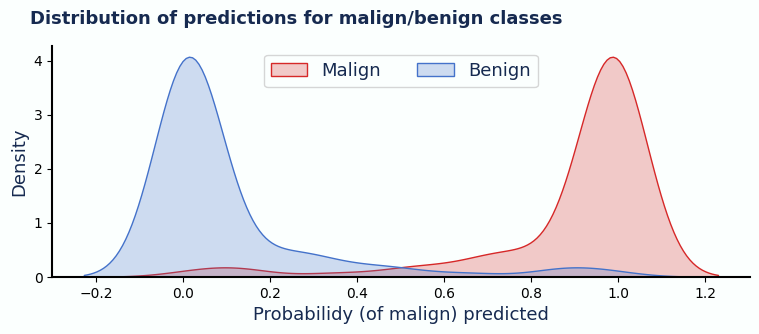

In [222]:
fig, ax = plt.subplots(figsize=(9, 3))
sns.kdeplot(predicts[:, 1][y_train], fill=True, label='Malign', 
            color='C1')
sns.kdeplot(predicts[:, 0][y_train], fill=True, label='Benign', 
            color='C0')
ax.set_xlabel('Probabilidy (of malign) predicted', fontsize=13, fontweight='regular')
ax.set_ylabel('Density', fontsize=13)

ax.legend(loc='upper center', ncol=2, fontsize=13)
fig.suptitle('Distribution of predictions for malign/benign classes', 
             fontsize=13, x=0.1, y=1, ha='left', fontweight='bold')

### Model evaluation Test data

In [204]:
y_test = (y_test == 'M')
predicts = cross_val_predict(search.best_estimator_, X_test, y_test, cv=3, 
                             method='predict_proba')

Text(33.222222222222214, 0.5, 'Pred Value')

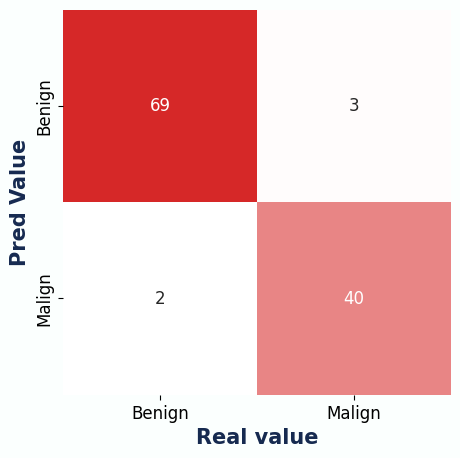

In [205]:
fig, ax = plt.subplots(figsize=(5, 5))

cmap = LinearSegmentedColormap.from_list('custom', ['white', 'C1'])
sns.heatmap(
    data=confusion_matrix(y_test, (predicts > 0.5)[:, 1]).T, 
    cmap=cmap, 
    cbar=False, 
    annot=True,
    fmt='.0f',
    xticklabels=['Benign', 'Malign'],
    yticklabels=['Benign', 'Malign'],
)

for text in ax.texts:
    text.set_fontsize(12)
ax.tick_params(labelsize=12)
ax.set_xlabel('Real value', fontweight='bold', fontsize=15)
ax.set_ylabel('Pred Value', fontweight='bold', fontsize=15)

In [206]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

bin_predicts = (predicts > 0.5)[:, 1]

performance = pd.DataFrame({
    'metric': ['accuracy', 'recall', 'precision'], 
    'value': [accuracy_score(y_test, bin_predicts),
              recall_score(y_test, bin_predicts), 
              precision_score(y_test, bin_predicts),]
})

performance

metric     value
0   accuracy  0.956140
1     recall  0.930233
2  precision  0.952381

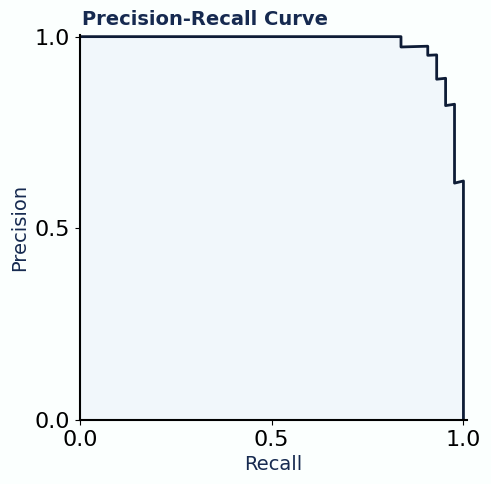

In [207]:
from sklearn.metrics import precision_recall_curve
pre, rec, thre = precision_recall_curve(y_test, predicts[:, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(
    [1] + list(rec), 
    [0] + list(pre),
    lw=2, color='C3')
ax.fill_between(rec, pre, color='C0', alpha=0.05)
ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set(xlim=[0, 1.01], ylim=[0, 1.005])

fig.suptitle('Precision-Recall Curve', fontsize=14, ha='left', fontweight='bold', 
             x=0.13, y=0.93)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.tick_params(labelsize=16)

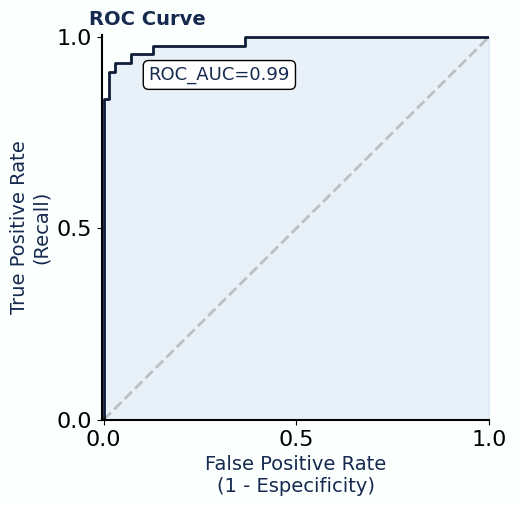

In [208]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thrs = roc_curve(y_test, predicts[:, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(fpr, tpr, lw=2, color='C3')
ax.fill_between(fpr, tpr, color='C0', alpha=0.1)
ax.set(xlim=[-0.005, 1], ylim=[0, 1.005])
ax.plot([0, 1], [0, 1], lw=2, ls='--', color='black', alpha=0.2)
ax.annotate(xy=(0.3, 0.9), text=f'ROC_AUC={roc_auc_score(y_test, predicts[:, 1]):.2f}', 
            ha='center', va='center', size=13, bbox={'boxstyle':'round', 'facecolor':'white'})

fig.suptitle('ROC Curve', fontsize=14, ha='left', fontweight='bold', 
             x=0.1, y=0.93)

ax.set_xlabel('False Positive Rate\n(1 - Especificity)', fontsize=14)
ax.set_ylabel('True Positive Rate\n(Recall)', fontsize=14)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.tick_params(labelsize=16)

Text(0.1, 1, 'Distribution of predictions for malign/benign classes')

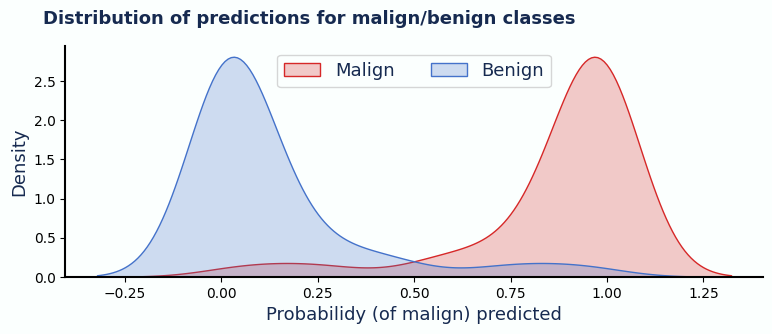

In [212]:
fig, ax = plt.subplots(figsize=(9, 3))
sns.kdeplot(predicts[:, 1][y_test], fill=True, label='Malign', 
            color='C1')
sns.kdeplot(predicts[:, 0][y_test], fill=True, label='Benign', 
            color='C0')
ax.set_xlabel('Probabilidy (of malign) predicted', fontsize=13, fontweight='regular')
ax.set_ylabel('Density', fontsize=13)

ax.legend(loc='upper center', ncol=2, fontsize=13)
fig.suptitle('Distribution of predictions for malign/benign classes', 
             fontsize=13, x=0.1, y=1, ha='left', fontweight='bold')

## Conclusions

Our machine learning model, utilizing a Support Vector Machine (SVM) algorithm, achieved high accuracy in predicting breast cancer malignancy. On the test data, it achieved an accuracy exceeding 95%.

To ensure the model's generalizability, we evaluated its performance beyond accuracy. The Area Under the ROC Curve (AUC-ROC) was also impressive, exceeding 0.99. Additionally, Precision-Recall and ROC curves were generated to provide a more comprehensive view of the model's performance.

However, It's important to note that high accuracy on a single dataset doesn't guarantee perfect performance in real-world scenarios. Further validation and testing are crucial for reliable clinical application. 